<a href="https://colab.research.google.com/github/nhaidaar/machine-learning-2024/blob/main/Jobsheet04_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

In [1]:
# import library

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

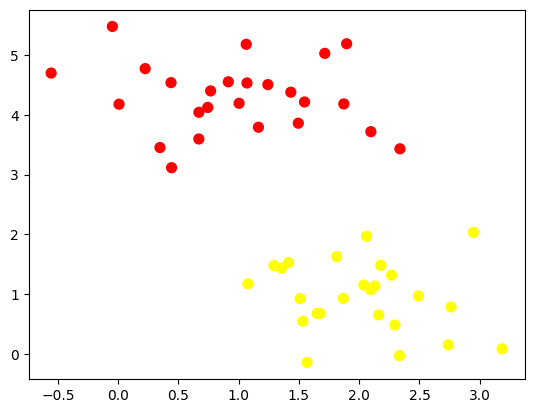

In [2]:
# make blobs (generate dataset)

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

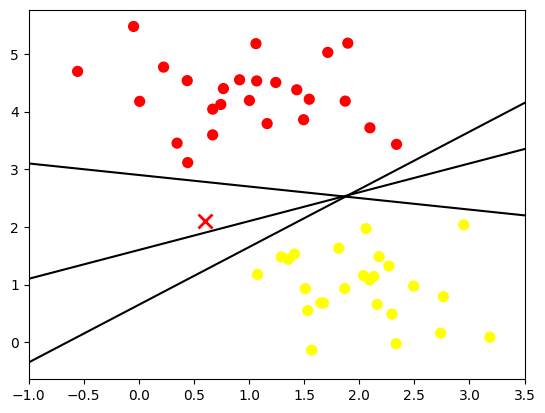

In [3]:
# buat garis pemisah data

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

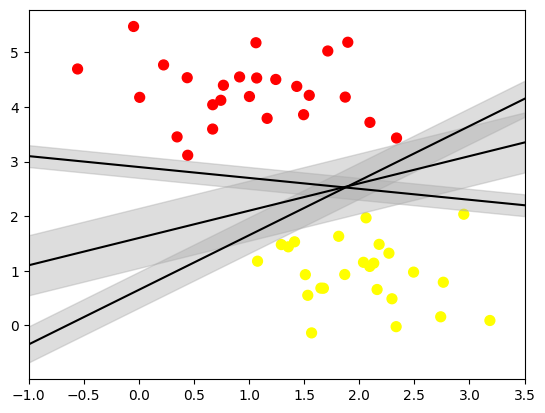

In [4]:
# margin garis

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [5]:
# penerapan fitting SVM

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

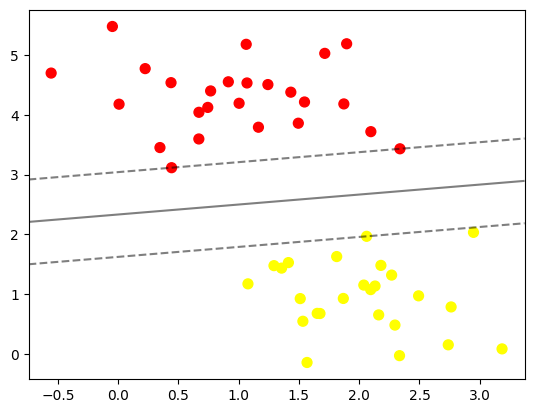

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [8]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

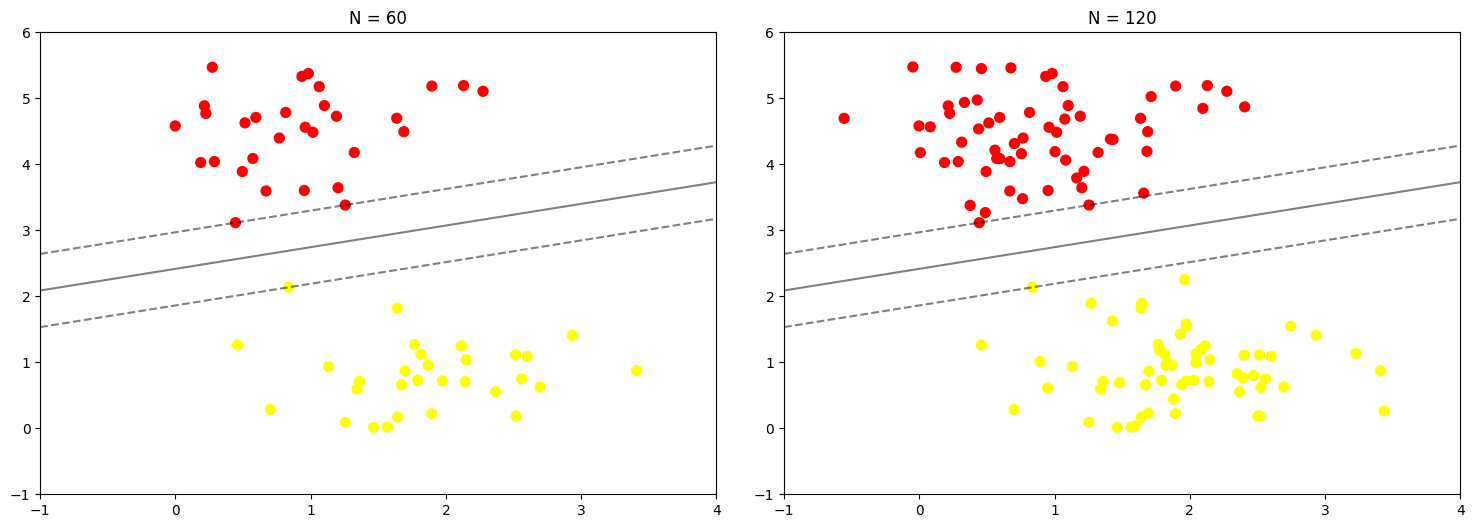

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

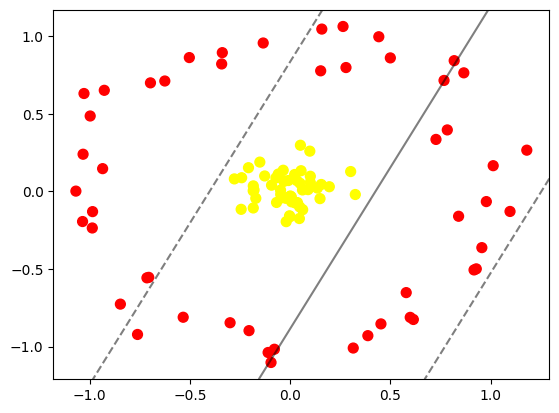

In [10]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [11]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.57587349e-01,  1.04696985e+00],
       [-2.44885525e-01, -1.15316575e-01],
       [ 1.51929003e-01,  7.77767754e-01],
       [-1.84263437e-01,  3.59283819e-02],
       [ 7.27223634e-01,  3.35410788e-01],
       [ 1.09660548e+00, -1.29070611e-01],
       [ 3.24662876e-01, -1.97594640e-02],
       [ 1.95030228e-01,  3.03536904e-02],
       [-7.61886749e-01, -9.22275251e-01],
       [ 8.40041391e-01, -1.60047888e-01],
       [ 7.67304449e-01,  7.15789450e-01],
       [-1.84420191e-01, -1.06640387e-01],
       [-3.15716639e-02,  6.48940850e-02],
       [-2.05613438e-01, -8.97535655e-01],
       [ 6.14251784e-01, -8.25619914e-01],
       [ 1.35435453e-01,  2.18502998e-02],
       [-4.31751050e-02, -4.11608318e-02],
       [-2.42358864e-01,  8.84281964e-02],
       [-8.47457851e-01, -7.26658550e-01],
       [ 1.00199942e-01,  9.79028576e-02],
       [ 4.52568365e-01, -8.54170535e-01],
       [ 3.60669816e-02, -7.17921247e-02],
       [-3.00100663e-01, -8.46684148e-01],
       [ 3.64632673e-04, -2.91054889e-02],
       [ 3.01540897e-01,  1.28326028e-01],
       [ 2.78152931e-01,  7.98937460e-01],
       [-1.10382495e-01, -1.03852068e+00],
       [-2.01304824e-02, -1.94806734e-01],
       [-1.34850528e-01,  9.57214194e-01],
       [-1.84765765e-01,  4.03579491e-03],
       [-4.83488959e-02,  8.49075029e-03],
       [ 5.39048859e-03, -3.48285794e-02],
       [ 9.28256835e-01, -4.99177572e-01],
       [-9.86207786e-01, -1.30132571e-01],
       [-9.27768355e-01,  6.52108775e-01],
       [-1.06940156e+00,  2.11006777e-03],
       [-9.87637116e-01, -2.35632981e-01],
       [-3.50275671e-02,  1.36691244e-01],
       [ 1.48582193e-01, -4.63387197e-02],
       [ 4.88616132e-02,  5.29460124e-02],
       [-1.80543006e-01,  9.46349429e-03],
       [ 9.78405852e-01, -6.54107258e-02],
       [-1.03614667e+00, -1.94101165e-01],
       [-1.71749557e-01, -4.42916553e-02],
       [ 4.41932149e-01,  9.97534352e-01],
       [-6.97374910e-01,  7.00177517e-01],
       [ 3.29401236e-02,  7.01715556e-02],
       [-5.96619396e-02,  1.12086067e-01],
       [-7.06038900e-01, -5.54000999e-01],
       [ 8.87652140e-02,  1.17322990e-02],
       [-1.03357281e+00,  2.39965082e-01],
       [-3.43796720e-03, -1.56964232e-01],
       [-2.08324184e-01,  1.53137841e-01],
       [ 5.98682166e-01, -8.12000652e-01],
       [-5.34069371e-01, -8.11213088e-01],
       [-9.42325560e-03,  7.03374818e-02],
       [ 4.99471672e-01,  8.61124627e-01],
       [-6.82801388e-02, -7.10306070e-02],
       [ 1.00203664e-01,  5.74806811e-02],
       [-9.36011763e-01,  1.46984205e-01],
       [ 3.87289177e-01, -9.29966715e-01],
       [-7.12777120e-02,  8.73820978e-02],
       [-3.09860085e-02,  6.86659242e-02],
       [-9.98104023e-01,  4.86473873e-01],
       [ 1.01261096e+00,  1.66036198e-01],
       [ 4.56433241e-02, -1.74693345e-01],
       [ 1.54853722e-01,  4.49361607e-02],
       [-1.27464228e-01,  9.98151294e-02],
       [ 2.63441191e-01,  1.06372488e+00],
       [ 2.21230915e-02,  1.09225308e-01],
       [ 5.07875508e-02,  2.97845317e-01],
       [ 9.56042174e-01, -3.62369397e-01],
       [-1.02898747e+00,  6.31520964e-01],
       [-4.75235901e-02, -1.93972529e-02],
       [-9.32579144e-02,  4.03753615e-02],
       [-1.51651519e-01,  1.89223793e-01],
       [-1.85321883e-03, -1.63716901e-01],
       [ 9.17051829e-01, -5.06174863e-01],
       [ 2.54579373e-02, -7.44742862e-02],
       [-7.14950222e-01, -5.57125035e-01],
       [ 8.66125562e-01,  7.64823512e-01],
       [ 7.83624416e-01,  3.96743986e-01],
       [ 9.77307785e-02,  2.59838463e-01],
       [-6.25719878e-01,  7.12119577e-01],
       [-7.91480188e-02, -1.01757550e+00],
       [ 8.18071115e-01,  8.43239578e-01],
       [-3.38889312e-01,  8.94975195e-01],
       [ 6.20931493e-02, -1.17441012e-01],
       [ 3.14364566e-01, -1.00977947e+00],
       [-2.21925214e-02, -4.41660018e-02],
       [-9.57874615e-02, -1.10290068e+00],
       [ 4.69580606e-02, -9.93205211e-02

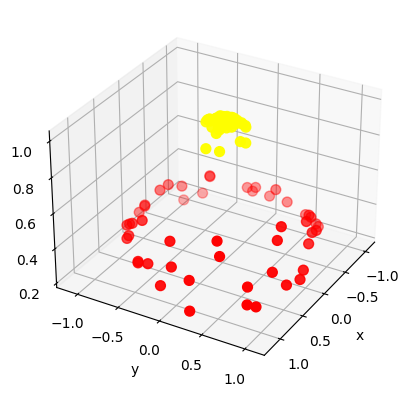

In [12]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed # import tambahan untuk mengatasi error

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

In [13]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

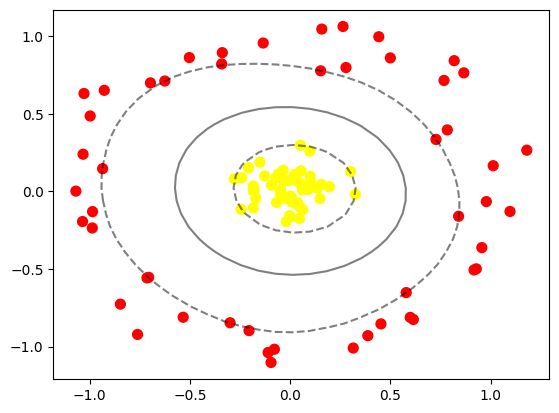

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

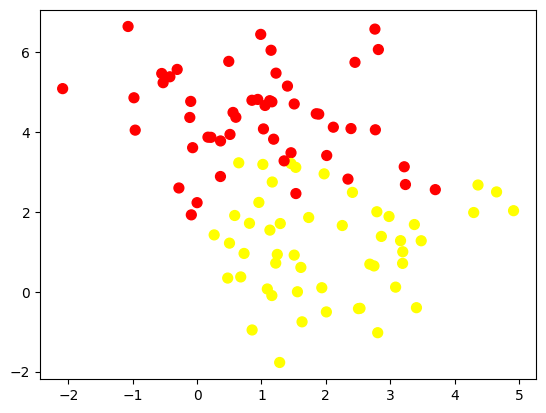

In [15]:
# data overlap

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

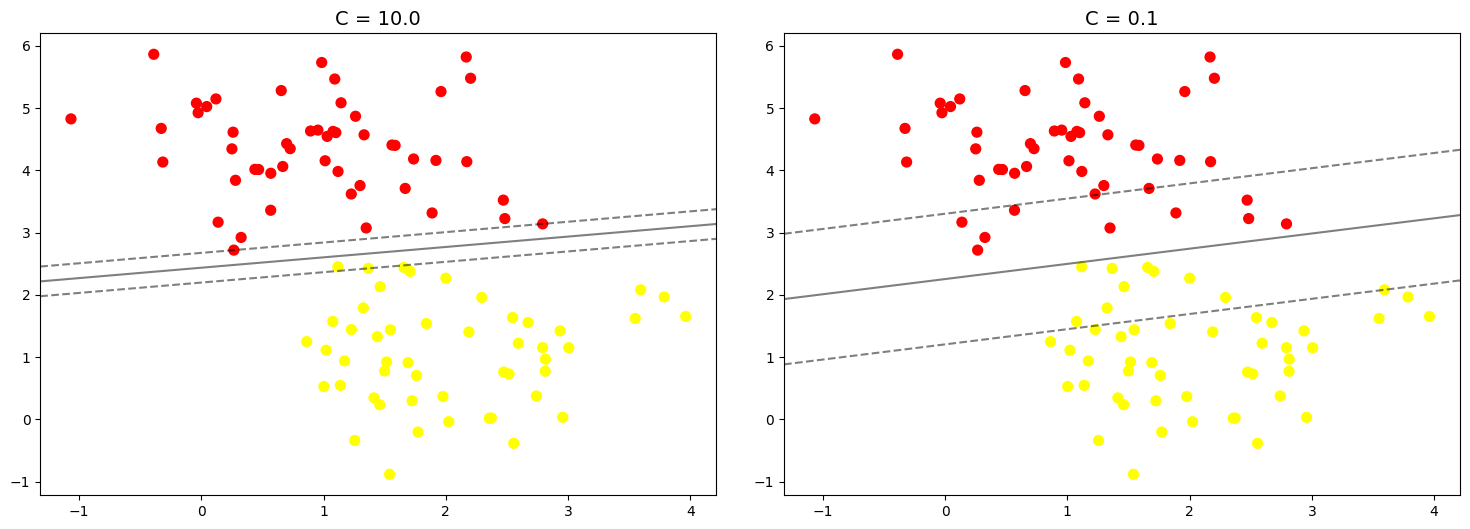

In [16]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Praktikum 2

In [17]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


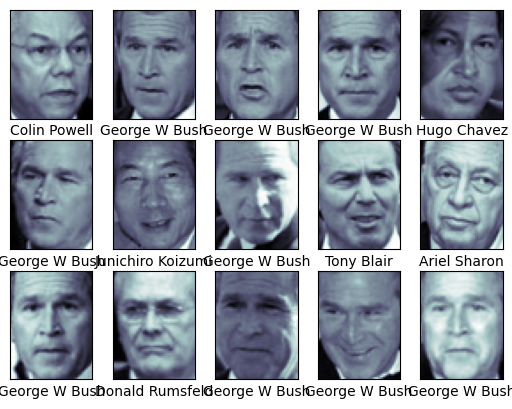

In [18]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [19]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [20]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 39s, sys: 26.6 s, total: 2min 6s
Wall time: 1min 25s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [22]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

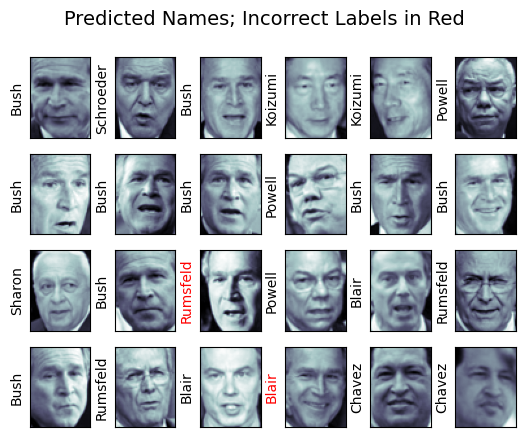

In [23]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

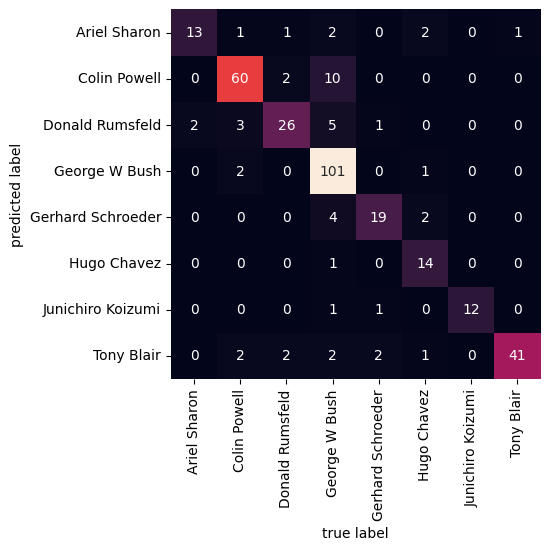

In [25]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Praktikum 5

In [26]:
# Langkah 0 - Import Library

from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Image directories
train_dir = "/content/drive/MyDrive/S5_MachineLearning/JS4/images/training/"
test_dir = "/content/drive/MyDrive/S5_MachineLearning/JS4/images/test/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image 229
(469, 640, 3)
Shape	: (469, 640, 3)
Label	: day
Label	: day


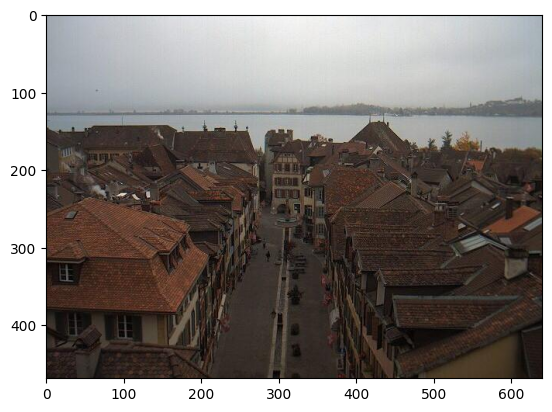

In [27]:
# Langkah 1 - Load Data dan Visualisasikan

# Fungsi untuk membuat daftar seluruh path dari gambar.
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

# Load training data
train_img = load_dataset(train_dir)

# Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.
train_img[0]

# Cek ukuran gambar secara acak
pick_random = np.random.randint(0, len(train_img))
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]

    # label_str = 'day' if label == 1 else 'night'

    if isinstance(label, str):
        if (label.find('day') != -1):
            label_str = 'day'
        else:
            label_str = 'night'
    else:
        if label == 1:
            label_str = 'day'
        else:
            label_str = 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')
    print(f'Label\t: {label_str}')

random_img_viz(train_img)

Image 123
(600, 1100, 3)
Shape	: (600, 1100, 3)
Label	: 1
Label	: day


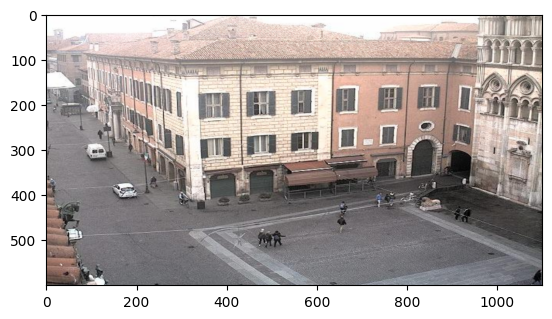

In [28]:
# Langkah 3 - Pra Pengolahan Data

# Fungsi utk menstandarkan ukuran gambar
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

# Fungsi utk kebutuhan encoding label
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

# Fungsi utk melakukan kedua hal tsb scr sekaligus utk semua gambar
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

# Pra pengolahan data training
train_std_img_list = preprocess(train_img)

# Pengecekan ukuran gambar scr acak
pick_random = np.random.randint(0, len(train_std_img_list))
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

random_img_viz(train_std_img_list)

Image 60
Avg Brighness: 48.8694


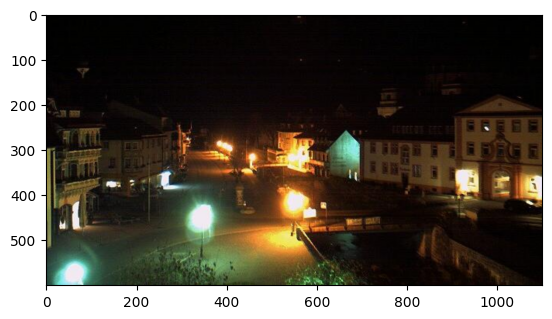

In [29]:
# Langkah 4 - Ekstraksi Fitur

# Fungsi utk mendapatkan mean brightness
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

# Pengecekan gambar yang telah melalui proses pra pengolahan, secara acak
rand_img = np.random.randint(0, len(train_std_img_list))
feature_img = train_std_img_list[rand_img][0]
avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

Image 106
Actual label: 0
Predicted label: 0


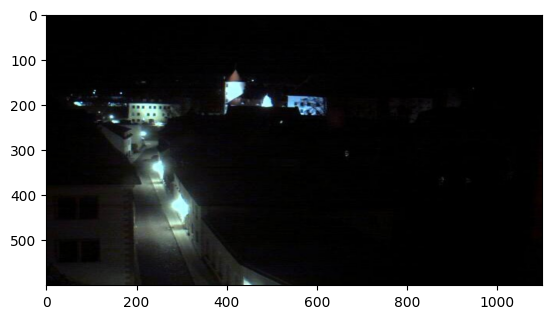

In [30]:
# Langkah 5 - Klasifikasi dengan Metode Threshold

def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

# Pengecekan prediksi secara acak
rand_img = np.random.randint(0, len(train_std_img_list))
pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [31]:
# Langkah 6 - Evaluasi (Manual)

def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

# Evaluate on test data
test_img = load_dataset(test_dir)
test_std_img_list = preprocess(test_img)
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8417
Accuracy: 0.8688


In [32]:
# Langkah 4 alternatif - Membuat Feature Vectors

# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])
    return df

# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (240, 2)
Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,46.693686,0.0
1,54.137088,0.0
2,14.008245,0.0
3,13.708703,0.0
4,47.079873,0.0


In [33]:
# Langkah 5 alternatif
# Membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn

from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

In [34]:
# Langkah 6 alternatif
# Evaluasi pada data training dan testing dengan bantuan library scikit-learn

from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# Tugas 2
Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data Percobaan 5 dengan menggunakan **fitur histogram**.

Shape	: (458, 800, 3)
Label	: night
Label	: night


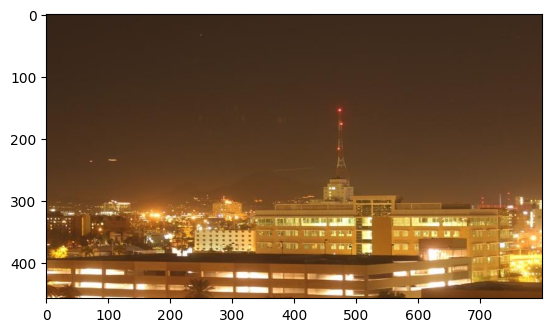

In [37]:
# Import library
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

# Direktori gambar
train_dir = "/content/drive/MyDrive/S5_MachineLearning/JS4/images/training/"
test_dir = "/content/drive/MyDrive/S5_MachineLearning/JS4/images/test/"

# Function load datasets
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

# Load training data
train_img = load_dataset(train_dir)

random_img_viz(train_img)

Shape	: (600, 1100, 3)
Label	: 0
Label	: night


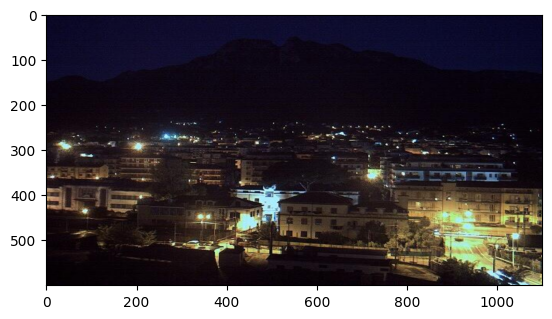

In [38]:
# Pra pengolahan data

def standarized_input(image):
    std_img = cv2.resize(image, (1100,600))
    return std_img

def label_encoder(label):
    num_val = 0
    if (label.find('day') != -1):
        num_val = 1

    return num_val

def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

train_std_img_list = preprocess(train_img)
random_img_viz(train_std_img_list)

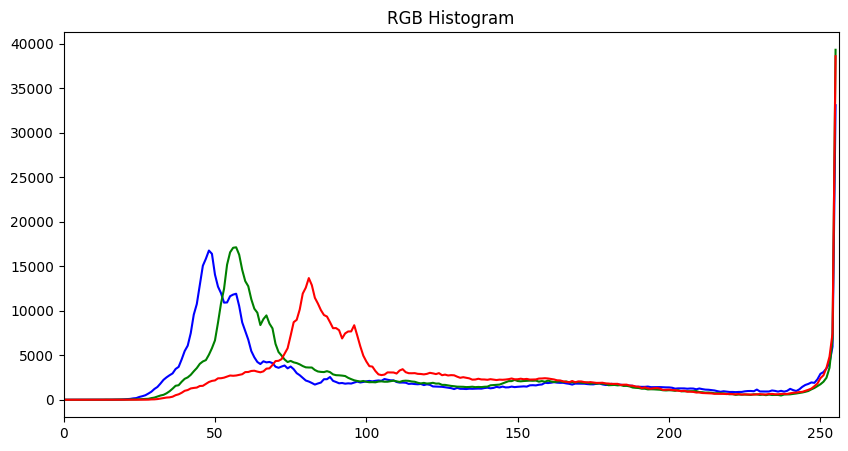

Shape: (240, 257)


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,LABELS
0,0.092121,0.367576,0.240909,0.127273,0.071818,0.044848,0.027273,0.014545,0.007576,0.003333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.003939,0.006667,0.006061,0.008182,0.008182,0.010000,0.013333,0.011515,0.014545,0.020303,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.113636,0.249697,0.316667,0.165758,0.076970,0.039394,0.018182,0.010303,0.004848,0.003030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.001515,0.003939,0.013030,0.022121,0.023333,0.036970,0.055758,0.060909,0.063636,0.075152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.000303,0.000000,0.000000,0.000303,0.000000,0.001212,0.000303,0.000303,...,0.001212,0.000303,0.000909,0.000606,0.000606,0.001212,0.001515,0.001212,0.004242,0


In [39]:
# Feature vectors

def get_rgb_histogram(image):
    rand_num = np.random.randint(0, len(image))
    chans = cv2.split(image[rand_num])  # Pisahkan gambar menjadi channel B, G, dan R
    hist_features = []

    # Menghitung histogram untuk setiap channel (B, G, R)
    for chan in chans:
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        hist = hist.flatten() / hist.sum()  # Normalisasi histogram
        hist_features.extend(hist)  # Menggabungkan semua channel

    return hist_features

def plot_rgb_histogram(image, title="RGB Histogram"):
    if isinstance(image, list):
        # If it's a list, randomly select one image
        rand_num = np.random.randint(0, len(image))
        image = image[rand_num][0]  # Assuming image is at index 0 of the tuple

    chans = cv2.split(image)
    colors = ('b', 'g', 'r')
    plt.figure(figsize=(10, 5))
    plt.title(title)
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.show()

# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    labels = []
    hist_list = []

    for img in img_list:
        img_label = img[1] # Get the image label
        img_hist = get_rgb_histogram(img[0])

        labels.append(img_label)
        hist_list.append(img_hist)

    # Create a Pandas dataframe
    df = pd.DataFrame(hist_list)
    df['LABELS'] = labels

    return df

# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
plot_rgb_histogram(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

In [40]:
# Klasifikasi dengan SVM

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train_avg_img.drop('LABELS', axis=1)
y = train_avg_img['LABELS']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

model_svc = SVC(kernel='rbf')
model_svc.fit(X_train_std, y_train)

y_pred_train = model_svc.predict(X_train_std)
y_pred_test = model_svc.predict(X_test_std)

acc_train_svc = accuracy_score(y_train, y_pred_train)
acc_test_svc = accuracy_score(y_test, y_pred_test)

print(f"Accuracy test: {acc_train_svc*100:.2f}%")
print(f"Accuracy test: {acc_test_svc*100:.2f}%")

Accuracy test: 89.06%
Accuracy test: 83.33%
